Dataset=Iris ,
C5.0 method  , Classification and Regression Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/iris (1).csv")

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#complete iris dataset
label_encoder=preprocessing.LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])

In [6]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
x=df.iloc[:,0:4]
y=df['Species']

In [8]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
df['Species'].unique()

array([0, 1, 2])

In [11]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [12]:
colnames=list(df.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [13]:
#Spiliting the data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

#Buliding Decision Tree Classifier using Entropy criteria

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)     
#max_depth is the Tree's depth node
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

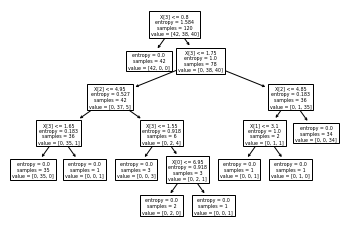

In [15]:
#Plot the Decision Tree
tree.plot_tree(model);

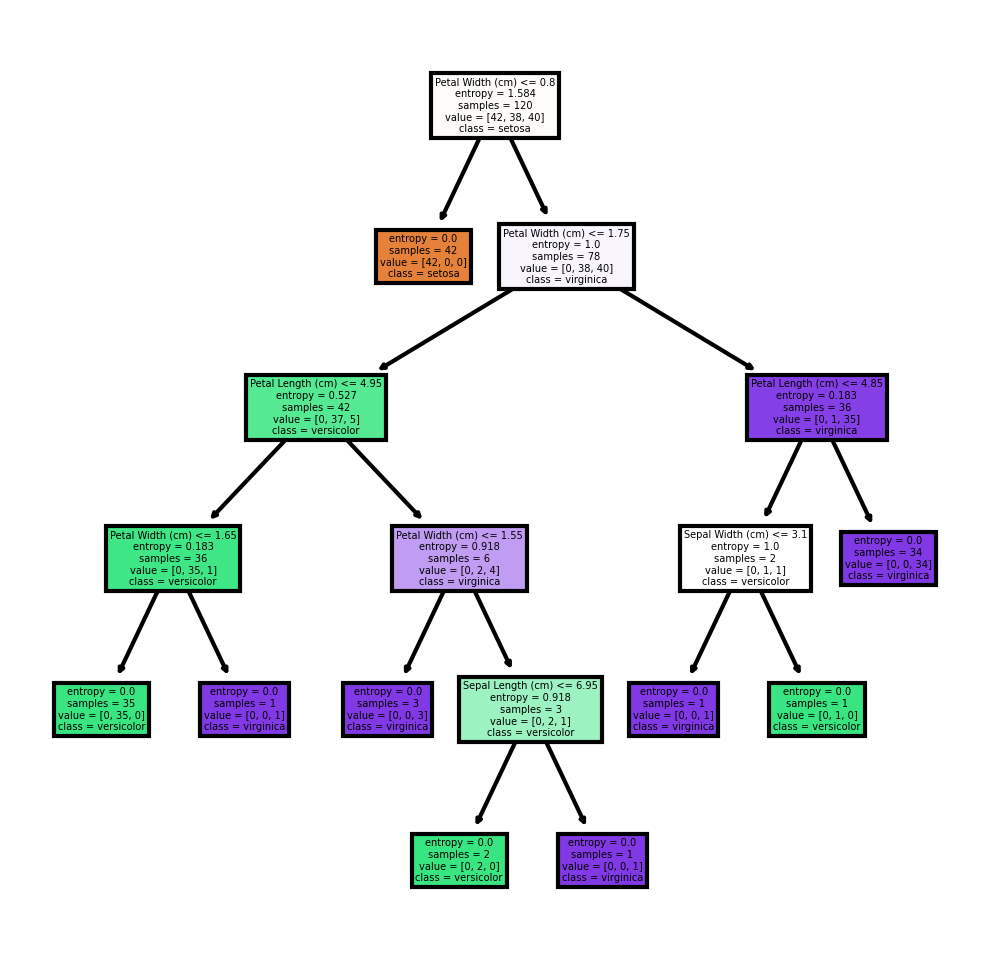

In [16]:
fn=['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']
cn=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [17]:
#Prediction on test date
preds=model.predict(x_test) #Predicting on test data set
pd.Series(preds).value_counts() #getting the count of each category

1    12
2    10
0     8
dtype: int64

In [18]:
x_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [19]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [20]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [21]:
#Accurancy
np.mean(preds==y_test)

1.0

With 5 depth Method .The Accuracy in 1. Accuracy is 100%.

#Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [25]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and Computing the Accuracy
pred=model.predict(x_train)


In [33]:
np.mean(preds==y_test)

1.0

Decision Tree Regression Example

In [34]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor


In [35]:
array=df.values
X=array[:,0:3]
y=array[:,3]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [39]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
#Acciuracy
model.score(X_test,y_test)

0.9001743707420156